In [1]:
import numpy as np
from ipywidgets import Button, Text, VBox, Output
from IPython.display import display
import powerPlants as pp
import electrolyzer as elec
import storage as stor
from demand import Demand, Scenario
import user_input as ui

import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'powerPlants'

In [2]:
capexInput = Text(value = '200', description = 'CAPEX: ', disabled= False)
aPInput =  Text(value = '1', description = 'Max Power Output: ', disabled= False)
alpha_ElecToH2Input =  Text(value = '10', description = 'alpha Elec to hydrogen: ', disabled= False)

addButton = Button(description= 'Add PowerPlant')

out = Output()

demand = Demand()
scenarioJupyter = Scenario(techList =[], demand =demand, message = "Scenario from Jupyter")

scenarioJupyter.demand.D_BaseElec = scenarioJupyter.hourlyProfile(value =1000)
scenarioJupyter.demand.D_H2 = scenarioJupyter.hourlyProfile( value= 10 )
scenarioJupyter.demand.D_heat = scenarioJupyter.hourlyProfile(value =0)

scenarioJupyter.techList.append(stor.Battery(CAPEX= 20, R= 0.3, FC = 10, initStorage = 0.2, finalStorage = 0.2, chargeP_max = 1, dischargeP_max = 1, eta_charge = 0.98, eta_discharge = 0.98, eta_selfDischarge = 0.02, name = "Battery1"))
scenarioJupyter.techList.append(stor.H2Storage(CAPEX= 10, R= 0.2, FC = 10, initStorage = 0.2, finalStorage = 0.2, chargeP_max = 1, dischargeP_max = 1, eta_charge = 1, eta_discharge = 0.98, eta_selfDischarge = 0.02, name = "H2Storage1"))


def onButClick(b):
    with out:
        try:
            capex = float(capexInput.value)
            ap = float(aPInput.value)
            pPlant = pp.SolarPanel(name ="Plant {}".format(len(scenarioJupyter.techList) +1), CAPEX = capex, aP = scenarioJupyter.hourlyProfile(value = ap, mode ="Cos"), R= 0.5, FC = 100,)
            scenarioJupyter.techList.append(pPlant)
            print("Added power plant: {}".format(pPlant.name))
        except ValueError:
            print("Error, could not add technology")

addButton.on_click(onButClick)


addElectrolyzer = Button(description= 'Add Electrolyzer')


def onElecClick(b):
    with out:
        try:
            capex = float(capexInput.value)
            alphaElecToH2 = float(alpha_ElecToH2Input.value)

            elctr = elec.AWE(name ="Electrolyzer {}".format(len(scenarioJupyter.techList) +1), CAPEX = capex, alpha_ElecToH2= alphaElecToH2, R= 0.15, VC_H2= 300)
            scenarioJupyter.techList.append(elctr)
            print("Added electrolyzer: {}".format(elctr.name))
        except ValueError:
            print("Error, could not add technology")

addElectrolyzer.on_click(onElecClick)

display(VBox([capexInput, aPInput, addButton]))
display(VBox([capexInput, alpha_ElecToH2Input, addElectrolyzer, out]))

            

In [5]:
ui.scenariosToRun.append(scenarioJupyter)

[0.86369048 0.86369048 0.86369048 ... 0.88392857 0.88392857 0.88392857]
Coin0506I Presolve 140 (-50) rows, 104 (-64) columns and 424 (-72) elements
Clp0014I Perturbing problem by 0.001% of 97.821705 - largest nonzero change 0.00097292999 ( 0.0059303054%) - largest zero change 0.0007887751
Clp0006I 0  Obj 0 Primal inf 8318.8029 (20)
Clp0000I Optimal - objective value 136877.93
Coin0511I After Postsolve, objective 136877.93, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 136877.9348 - 90 iterations time 0.002, Presolve 0.00
Starting solution of the Linear programming problem using Dual Simplex

Required capacity:
RealSolar = -0.0
RealWind = 3549.8416725945053
DummyNuclear = 0.0
AWE1 = 100.00000000000001
Battery1 = 4160.092430961162
H2Storage1 = 0.0
Objective value =  443245.0128452071
10


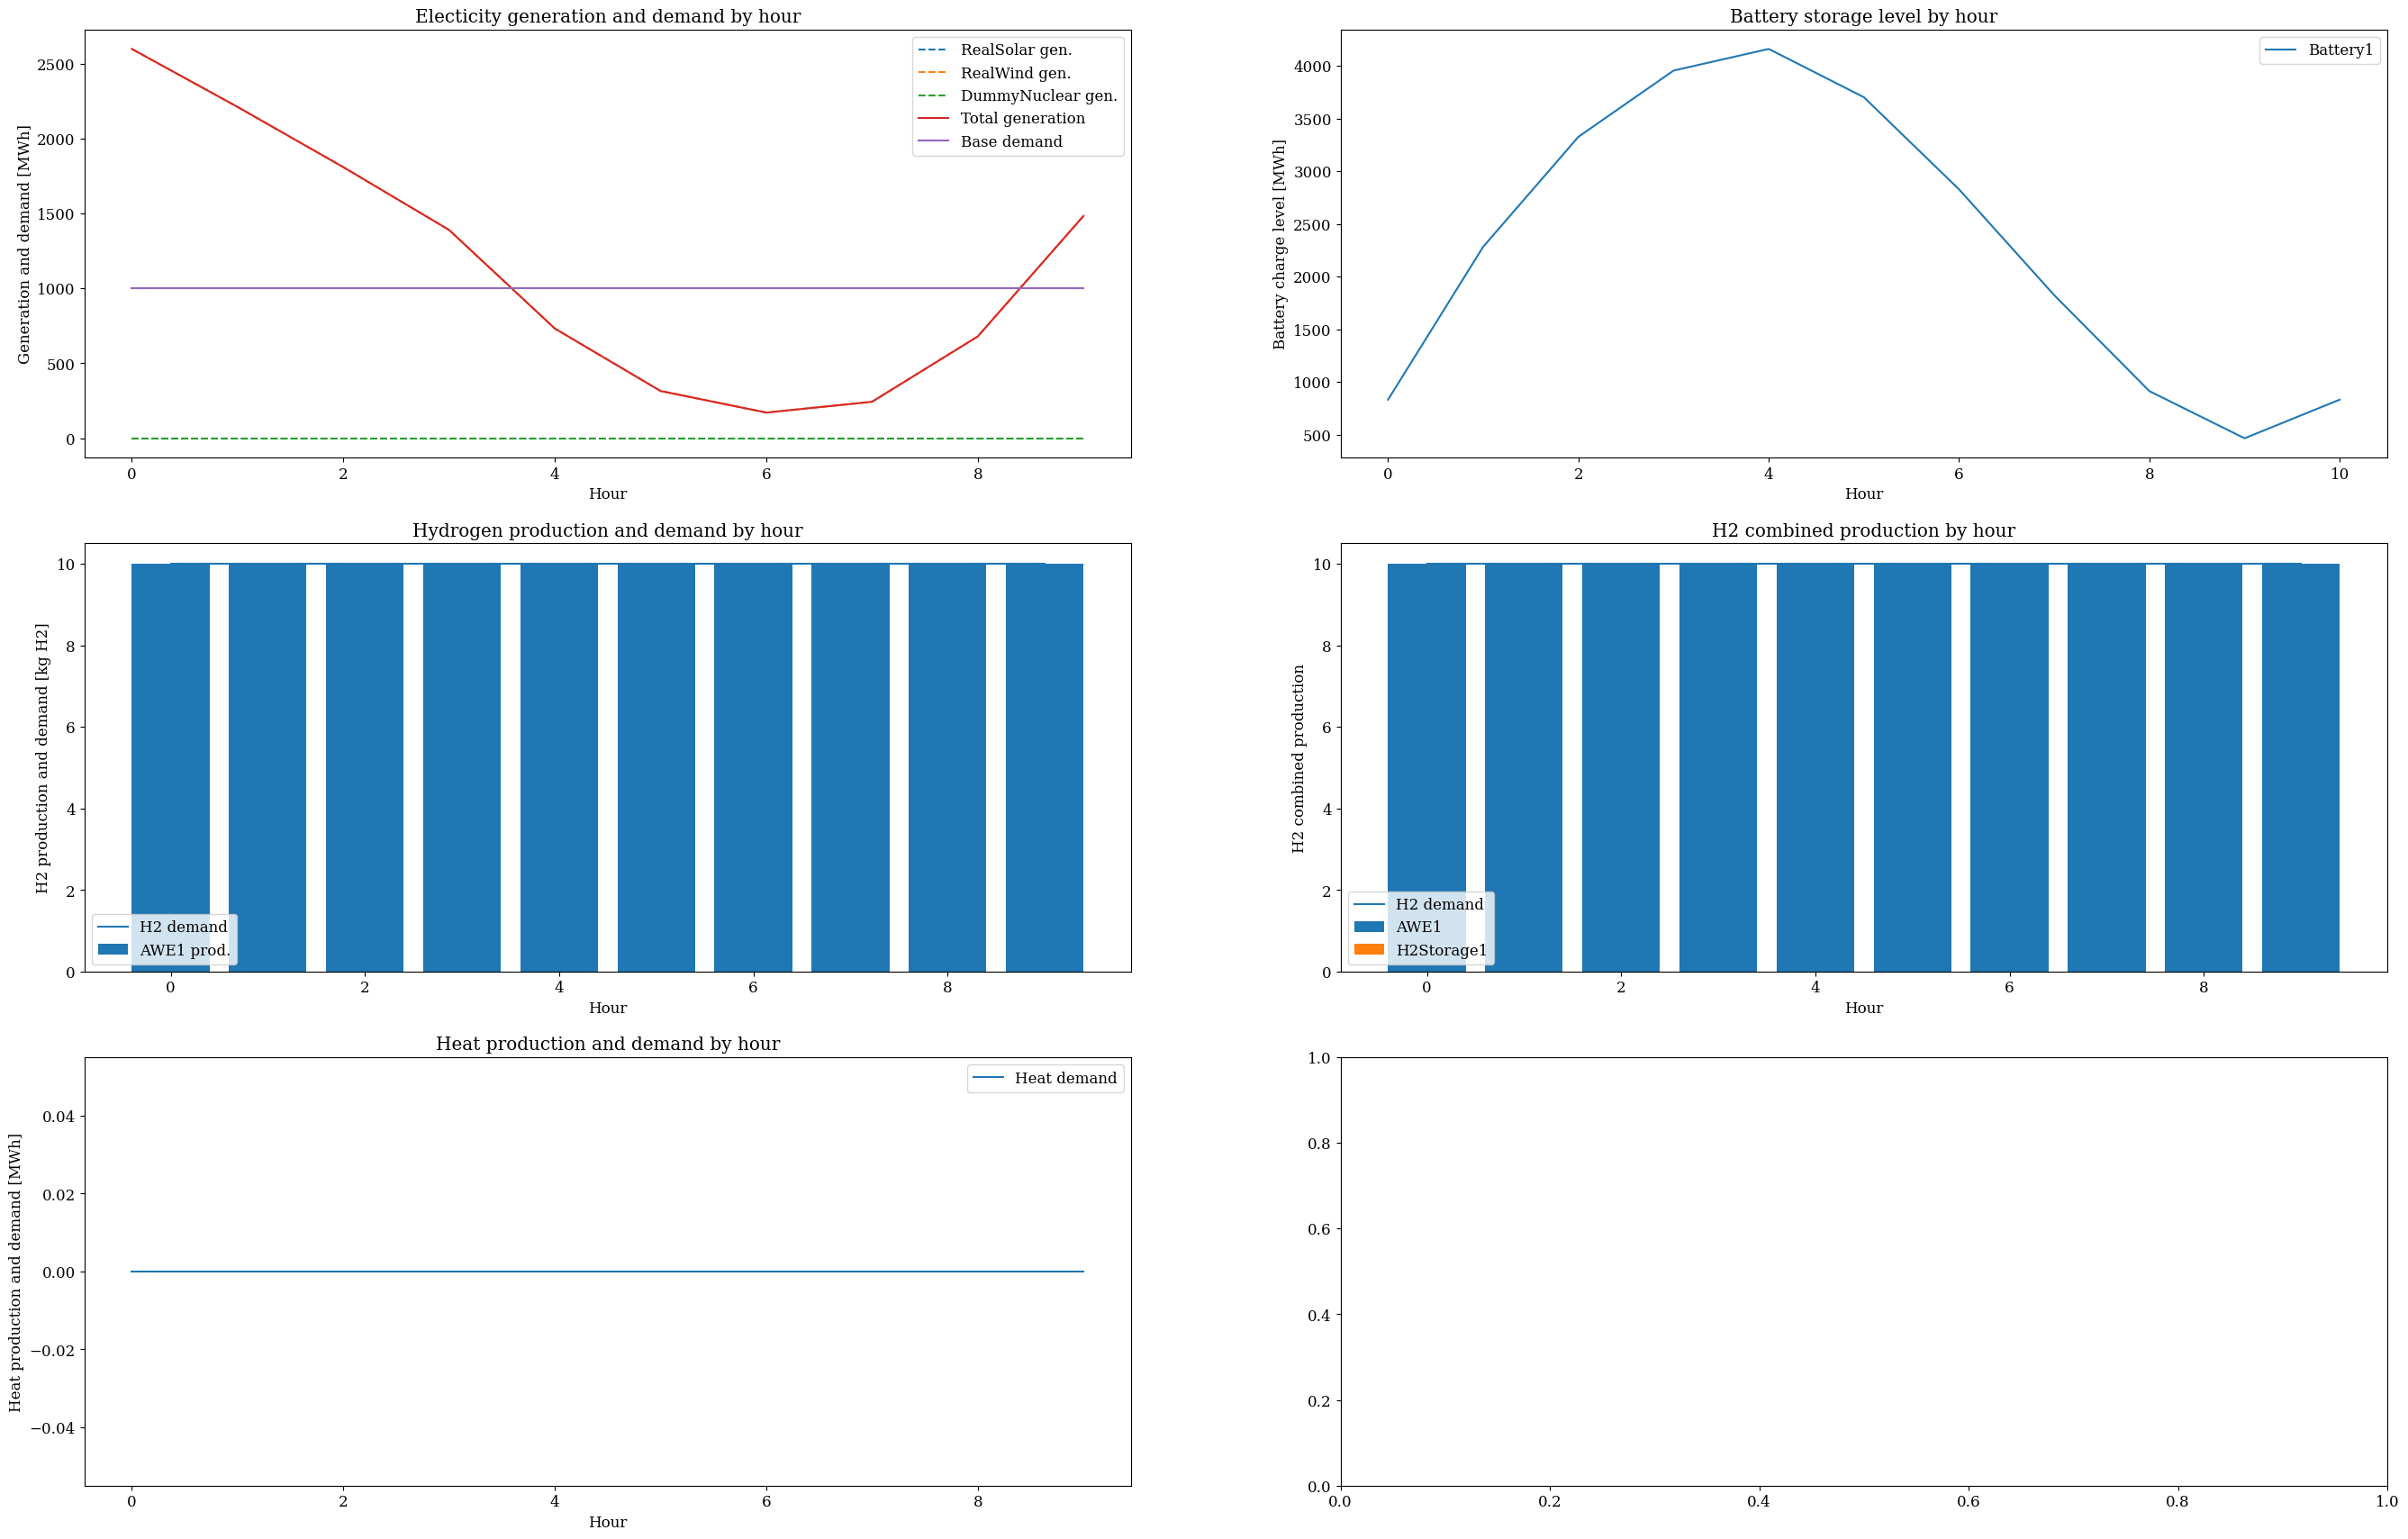

Clp0024I Matrix will be packed to eliminate 8 small elements
Coin0506I Presolve 131 (-51) rows, 96 (-72) columns and 369 (-101) elements
Clp0014I Perturbing problem by 0.001% of 10641.002 - largest nonzero change 0.038156266 ( 0.76681133%) - largest zero change 0.038095335
Clp0006I 0  Obj 0 Primal inf 9878.5588 (30)
Clp0000I Optimal - objective value 443245.01
Coin0511I After Postsolve, objective 443245.01, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 443245.0128 - 79 iterations time 0.002, Presolve 0.00
Starting solution of the Linear programming problem using Dual Simplex

Required capacity:
Battery1 = 893.4137843127615
H2Storage1 = 117.92167071107005
Plant 3 = 0.0
Electrolyzer 4 = 0.0
Electrolyzer 5 = 0.0
Plant 6 = 0.0
Plant 7 = 1097.3196774137518
Electrolyzer 8 = 154.36322532594428
Objective value =  136877.93478902755
10


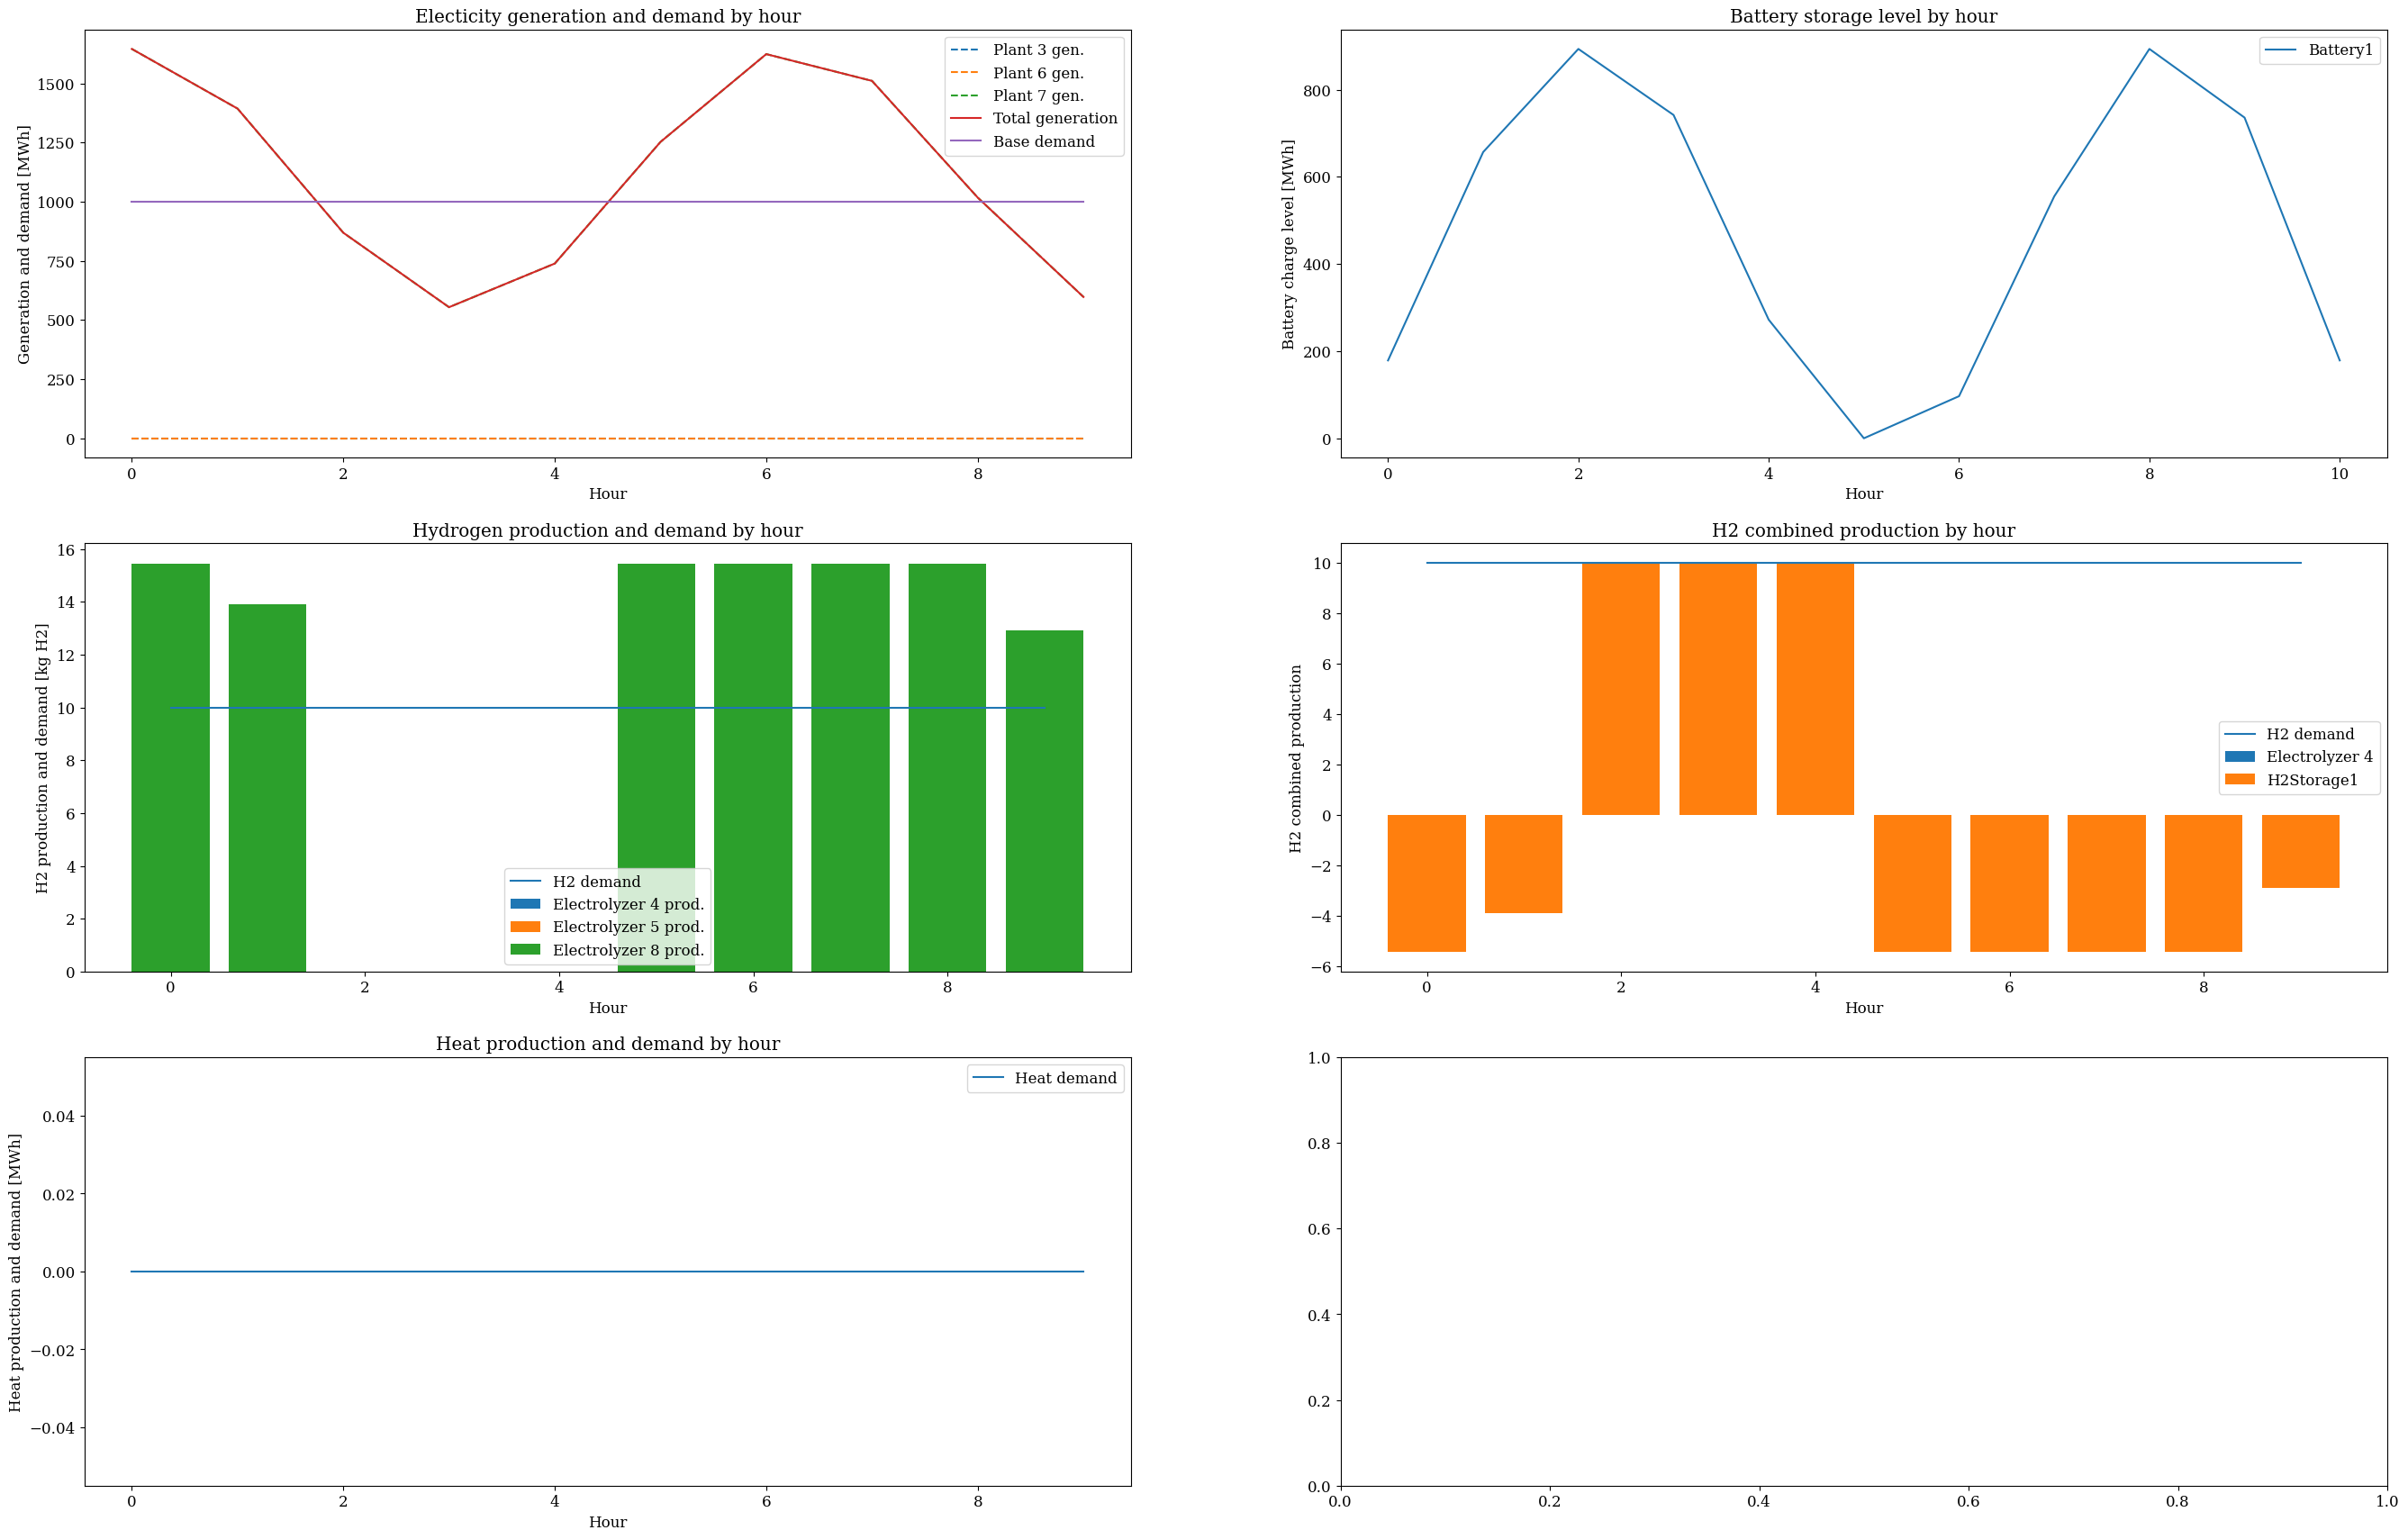

Coin0506I Presolve 160 (-62) rows, 126 (-84) columns and 494 (-104) elements
Clp0014I Perturbing problem by 0.001% of 97.821705 - largest nonzero change 0.00097292999 ( 0.0059303054%) - largest zero change 0.0007887751
Clp0006I 0  Obj 0 Primal inf 8318.8029 (20)
Clp0000I Optimal - objective value 136877.93
Coin0511I After Postsolve, objective 136877.93, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 136877.9348 - 104 iterations time 0.002, Presolve 0.00
Starting solution of the Linear programming problem using Dual Simplex

Required capacity:
Battery1 = 893.4137843127615
H2Storage1 = 117.92167071107005
Plant 3 = 0.0
Electrolyzer 4 = 0.0
Electrolyzer 5 = 0.0
Plant 6 = 0.0
Plant 7 = 1097.3196774137518
Electrolyzer 8 = 154.36322532594428
Objective value =  136877.93478902755
10


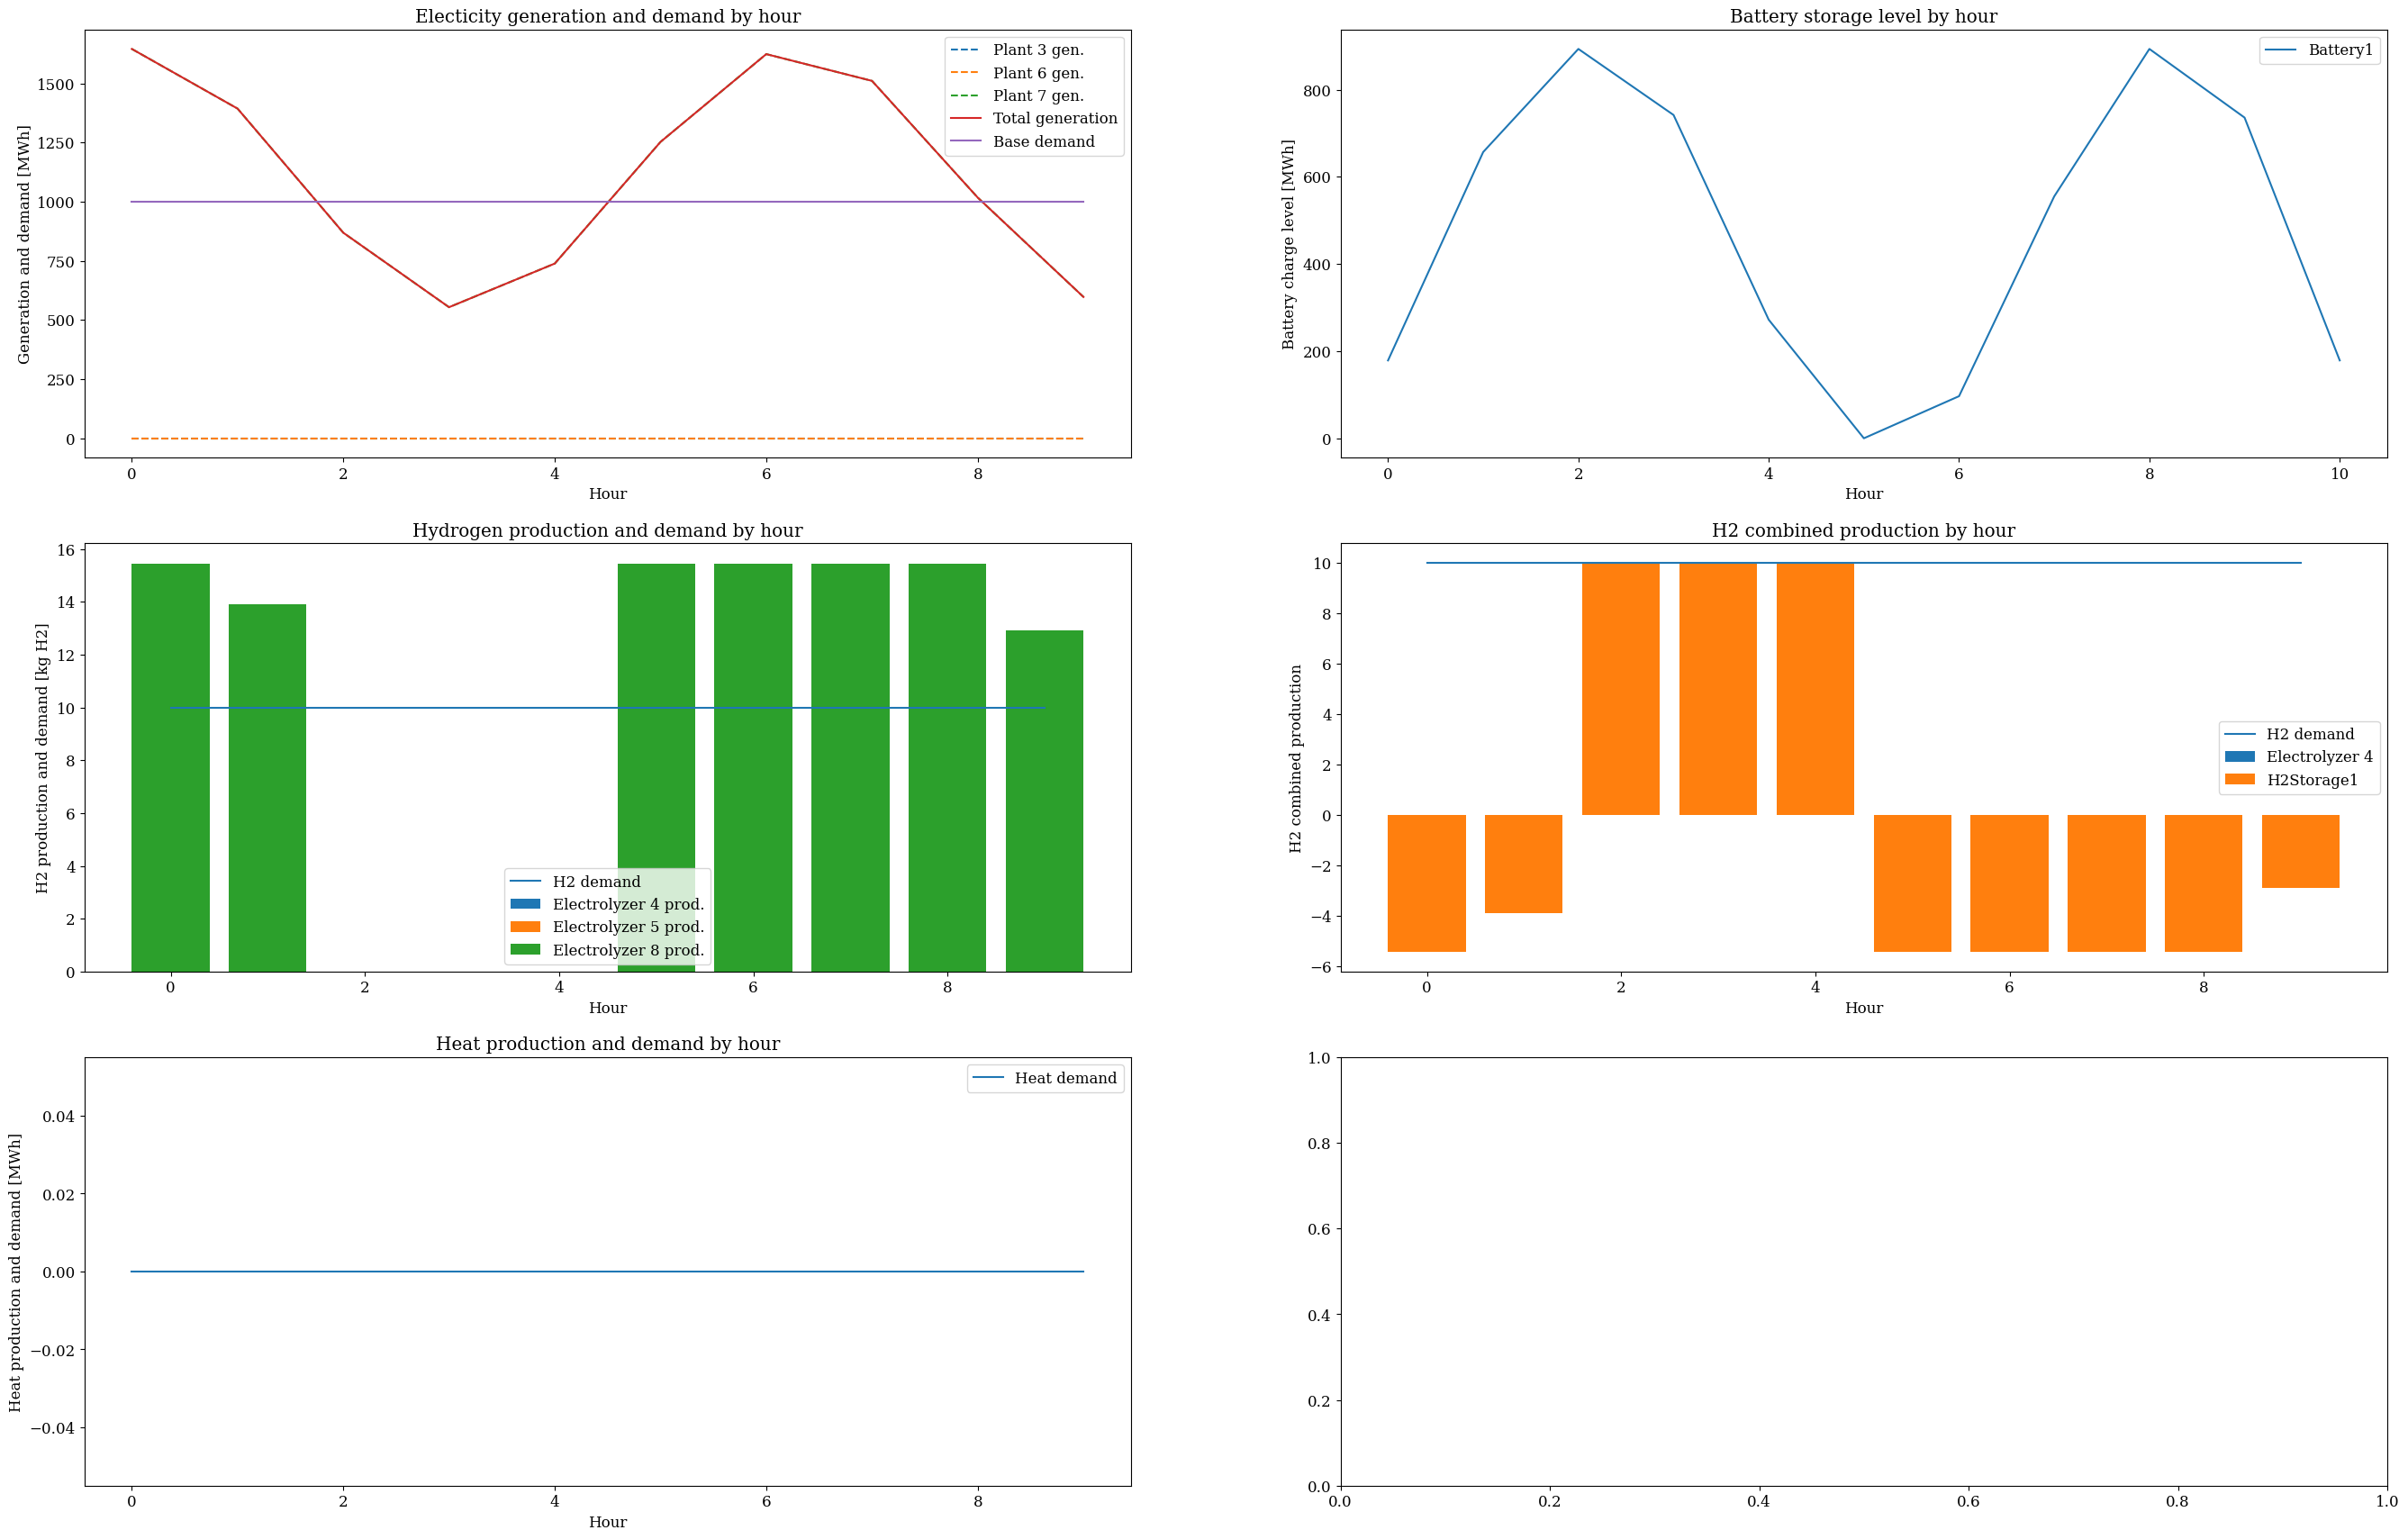

In [6]:

%run  'main.py'